# [1] Método de Euler via planilha eletrônica

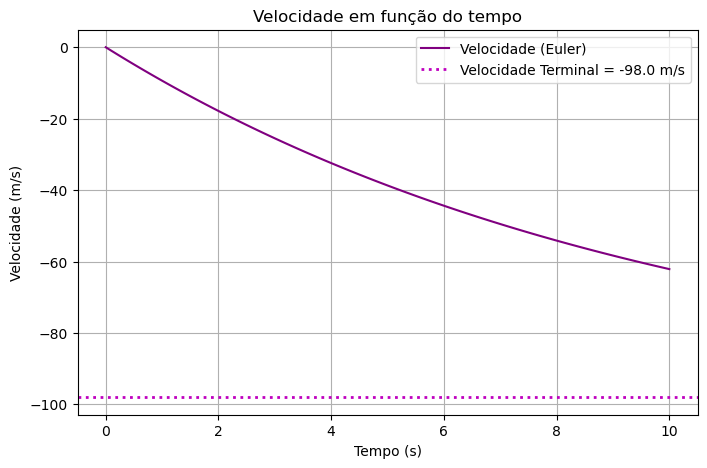

In [5]:
# 1d. Refaça o mesmo problema acima, mas agora em python usando arrays
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
g = 9.8       # aceleração da gravidade (m/s²)
b = 0.1       # coeficiente de arrasto (kg/s)
m = 1.0       # massa do corpo (kg)
v0 = 0.0      # velocidade inicial (m/s)
dt = 0.1      
n_steps = 100 # número de passos


t = np.zeros(n_steps + 1)
v = np.zeros(n_steps + 1)

# Condição inicial
t[0] = 0.0
v[0] = v0

# Método de Euler
for n in range(n_steps):
    dvdt = -g - (b / m) * v[n]
    v[n+1] = v[n] + dvdt * dt
    t[n+1] = t[n] + dt

# Velocidade terminal teórica
v_terminal = - (g * m) / b


plt.figure(figsize=(8, 5))
plt.plot(t, v, 'purple', label='Velocidade (Euler)')
plt.axhline(y=v_terminal, color='m', linestyle=':', linewidth=2, label=f'Velocidade Terminal = {v_terminal:.1f} m/s')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade em função do tempo')
plt.grid(True)
plt.legend()
plt.show()

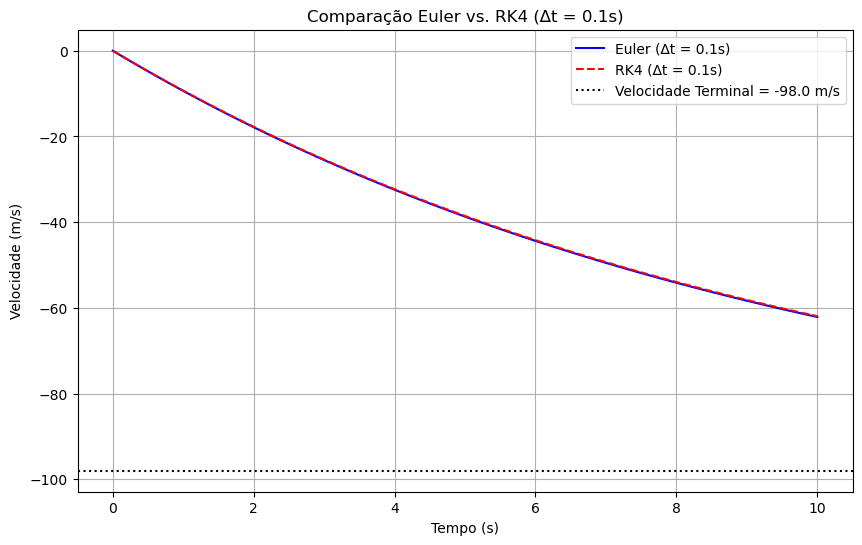

deltat = 0.1s:
  Erro Euler: 35.871169
  Erro RK4: 36.052185



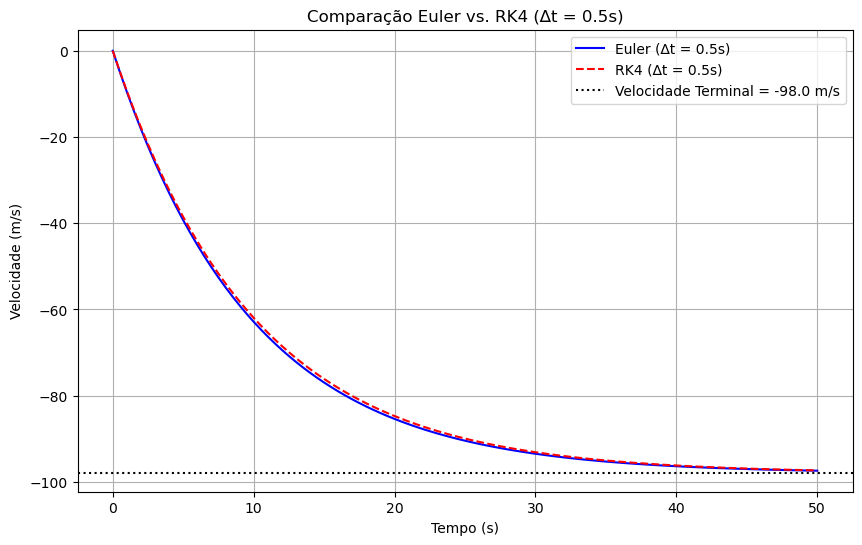

deltat = 0.5s:
  Erro Euler: 0.580212
  Erro RK4: 0.660319



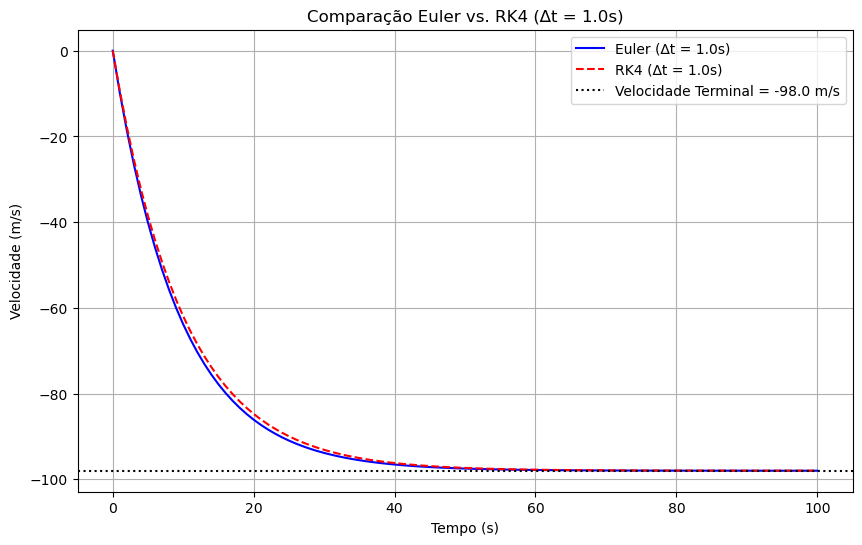

deltat = 1.0s:
  Erro Euler: 0.002603
  Erro RK4: 0.004449



In [2]:

#1e( método runge kutta)
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
g = 9.8       # aceleração da gravidade (m/s²)
b = 0.1       # coeficiente de arrasto (kg/s)
m = 1.0       # massa do corpo (kg)
v0 = 0.0      # velocidade inicial (m/s)
dt_values = [0.1, 0.5, 1.0]  # Diferentes passos temporais para teste
n_steps = 100  # Número de passos

# Função da derivada dv/dt
def dvdt(v):
    return -g - (b/m) * v

# Método de Euler
def euler_method(dt):
    t = np.zeros(n_steps + 1)
    v = np.zeros(n_steps + 1)
    v[0] = v0
    for n in range(n_steps):
        v[n+1] = v[n] + dvdt(v[n]) * dt
        t[n+1] = t[n] + dt
    return t, v

# Método de Runge-Kutta (RK4)
def rk4_method(dt):
    t = np.zeros(n_steps + 1)
    v = np.zeros(n_steps + 1)
    v[0] = v0
    for n in range(n_steps):
        k1 = dvdt(v[n])
        k2 = dvdt(v[n] + 0.5 * k1 * dt)
        k3 = dvdt(v[n] + 0.5 * k2 * dt)
        k4 = dvdt(v[n] + k3 * dt)
        v[n+1] = v[n] + (1/6) * (k1 + 2*k2 + 2*k3 + k4) * dt
        t[n+1] = t[n] + dt
    return t, v


v_terminal = - (g * m) / b

# Plotagem para cada passo ∆t
for dt in dt_values:
    # Calcula as soluções
    t_euler, v_euler = euler_method(dt)
    t_rk4, v_rk4 = rk4_method(dt)

    # Plota os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(t_euler, v_euler, 'b-', label=f'Euler (∆t = {dt}s)')
    plt.plot(t_rk4, v_rk4, 'r--', label=f'RK4 (∆t = {dt}s)')
    plt.axhline(y=v_terminal, color='k', linestyle=':', label=f'Velocidade Terminal = {v_terminal:.1f} m/s')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    plt.title(f'Comparação Euler vs. RK4 (∆t = {dt}s)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Imprime erros no último passo
    error_euler = np.abs(v_euler[-1] - v_terminal)
    error_rk4 = np.abs(v_rk4[-1] - v_terminal)
    print(f"deltat = {dt}s:")
    print(f"  Erro Euler: {error_euler:.6f}")
    print(f"  Erro RK4: {error_rk4:.6f}\n")